<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/team3/cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D , BatchNormalization
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint
from keras import backend as K


 
from livelossplot.inputs.tf_keras import PlotLossesCallback


In [17]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats


mkdir: cannot create directory ‘/root/.kaggle’: File exists
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
  
 
from google.colab import files
# Data
path_train = '/content/train.zip' 
path_test ='/content/test1.zip'
import zipfile

with zipfile.ZipFile(path_train,"r") as z:
    z.extractall(".")
with zipfile.ZipFile(path_test ,"r") as y:
    y.extractall(".")    
  


    

In [20]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [72]:
import os
import pandas as pd
import random

filenames = os.listdir("/content/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [23]:
df.head()


,filename,category
0,cat.2280.jpg,0
1,dog.10537.jpg,1
2,dog.4460.jpg,1
3,cat.8308.jpg,0
4,cat.8196.jpg,0


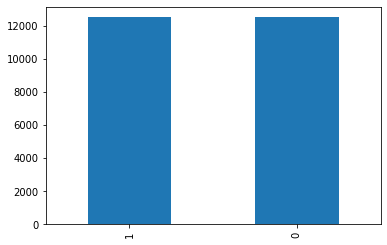

In [26]:
df['category'].value_counts().plot.bar()

In [27]:
 model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [29]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [30]:
earlystop = EarlyStopping(patience=10)

In [31]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
callbacks = [earlystop, learning_rate_reduction]

In [33]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [34]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

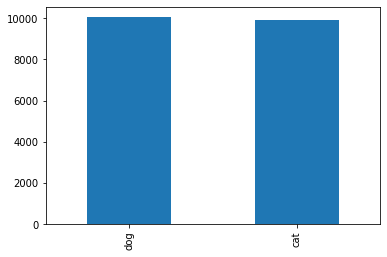

In [35]:
train_df['category'].value_counts().plot.bar()

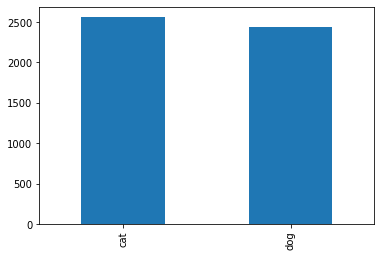

In [36]:
validate_df['category'].value_counts().plot.bar()


In [37]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [41]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "/content/train",x_col='filename',y_col='category',
                                                 target_size=IMAGE_SIZE,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)


)
"""


"""

Found 20000 validated image filenames belonging to 2 classes.


'\nvalidation_datagen = ImageDataGenerator(rescale=1./255)\nvalidation_generator = validation_datagen.flow_from_dataframe(\n    validate_df, \n    "./dogs-vs-cats/train/", \n    x_col=\'filename\',\n    y_col=\'category\',\n    target_size=Image_Size,\n    class_mode=\'categorical\',\n    batch_size=batch_size\n)\n\ntest_datagen = ImageDataGenerator(rotation_range=15,\n                                rescale=1./255,\n                                shear_range=0.1,\n                                zoom_range=0.2,\n                                horizontal_flip=True,\n                                width_shift_range=0.1,\n                                height_shift_range=0.1)\n\ntest_generator = train_datagen.flow_from_dataframe(train_df,\n                                                 "./dogs-vs-cats/test/",x_col=\'filename\',y_col=\'category\',\n                                                 target_size=Image_Size,\n                                                 class_mode=\'

In [46]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [57]:
test_filenames = os.listdir("/content/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [53]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


In [58]:
import numpy as np

predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
test_df['category'] = np.argmax(predict, axis=-1)

In [60]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [61]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

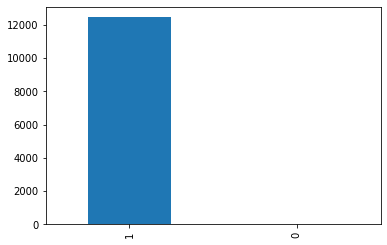

In [67]:
test_df['category'].value_counts().plot.bar()

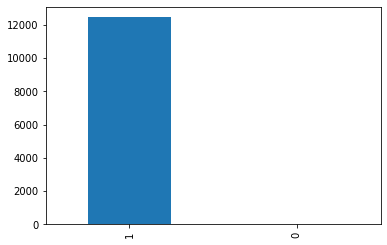

In [71]:
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })
test_df['category'].value_counts().plot.bar()

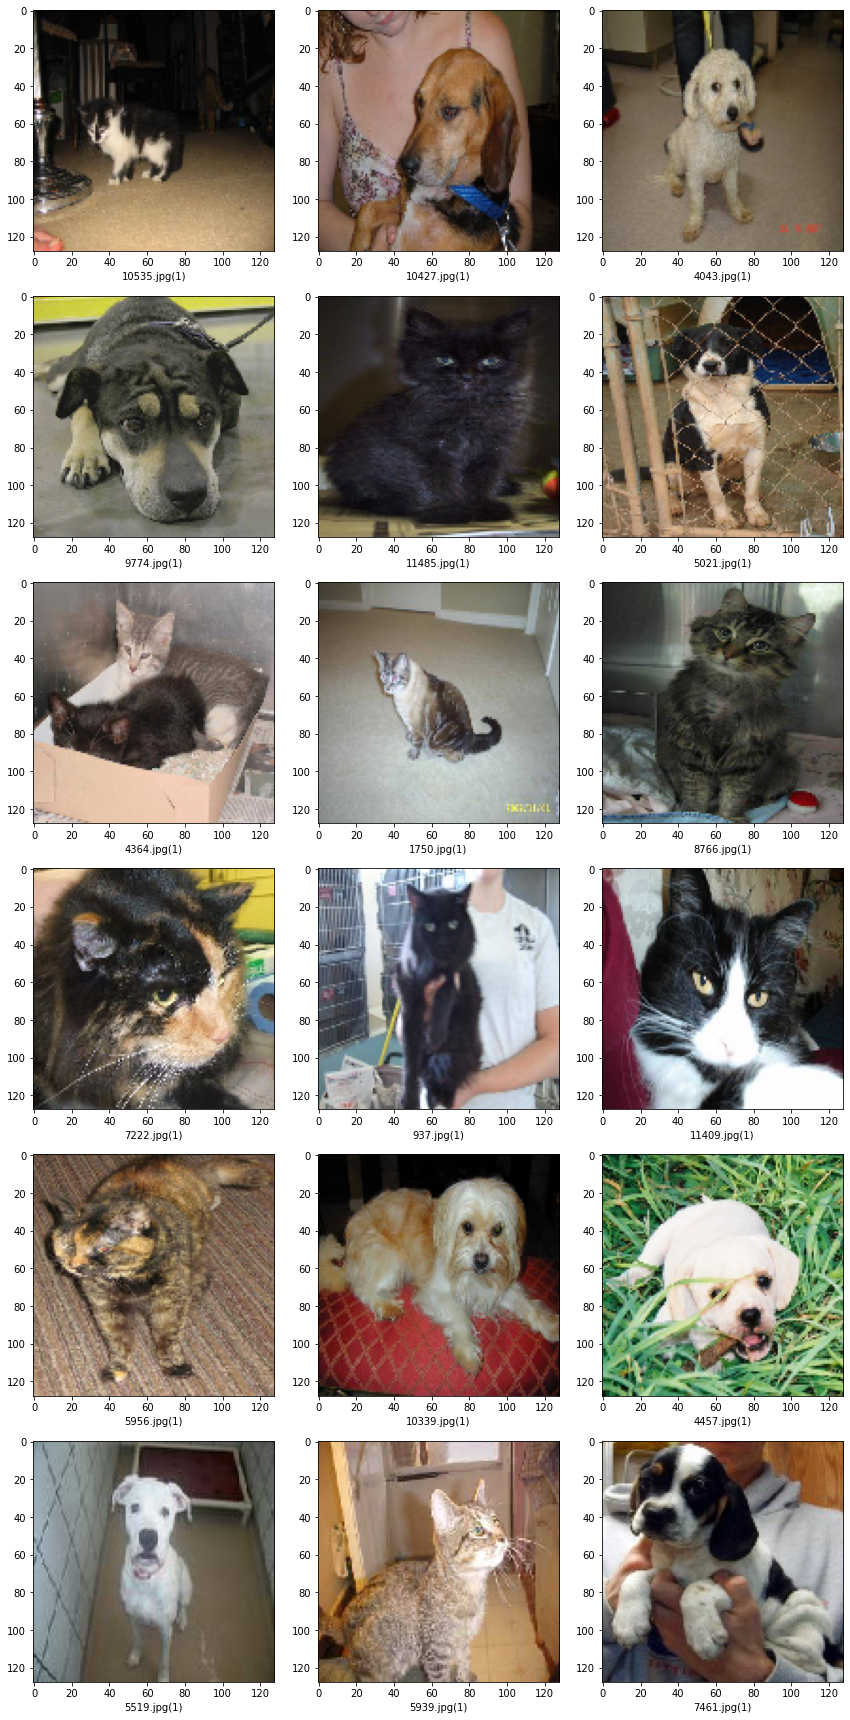

In [66]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [65]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)